# Supermarket Sales

## 1.Introduction

In this project, we will dive into the transaction-level sales data of a supermarket chain to extract meaningful business insights. By analyzing the data at a granular level, we aim to uncover valuable patterns, trends, and opportunities that can contribute to informed decision-making and drive business growth.

### Objective

The supermarket chain wants to run some promotions and they have a fixed budget for the same. Business wants insights from the data on how to most efficiently allocate these funds.

The objectives are as following -

•	Provide insights to Marketing head for allocating funds. The funds should be allocated in such a way so that the promotional return can be maximized.

•	Any new Strategy or strategy changes suggestions to improve revenue

### Data 

•	The data belongs to a supermarket chain in Myanmar, with stores in 3 cities.

•	This is a sampled data of 1000 transactions and 20 fields for each transaction

•	All transactions belong to year 2019



#### **IMPORTING LIBRARIES**

!pip install folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

#### **Changing default figure size and applying theme**

In [2]:
print("Earlier figure default size was :",plt.rcParams['figure.figsize'])
plt.rcParams['figure.figsize']=(10,5)
print('Now figure default size is :',plt.rcParams['figure.figsize'])

Earlier figure default size was : [6.4, 4.8]
Now figure default size is : [10.0, 5.0]


In [3]:
plt.style.use('ggplot')

## **2.DATA WRANGLING**

In [4]:
url= 'https://drive.google.com/file/d/1wiUU3i7WT0JS8sWMRAgMMmciA0NzGbyS/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
aa = pd.read_csv(url)

pd.set_option('display.max_colwidth', None)
aa

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a different branch
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has stores in 3 cities
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


In [5]:
url = "https://drive.google.com/file/d/1t4CefmXzU2ZIhh5NSGb6hIYMvRz7nReU/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url) 

In [6]:
df.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [7]:
shape=df.shape
print(f'The sales data has {shape[0]} rows and {shape[1]} columns')

The sales data has 1000 rows and 20 columns


In [8]:
df.describe().iloc[1:,:].style.background_gradient(cmap='hot')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


Following are the observations from 5 number summary - 

* Unit Price has range of 10-99, with mean price of 55
* Avg qty ordered per transaction is 6.5, the range being 1-14
* Invoice total mean is 323, and the range is 10-1042
* Gross Margin is constant as 4.76%
* Mean rating is 7.46/10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

### **DATA IMPUTATION**

#### **CHECKING NULL %AGE**

In [10]:
# Null % for all columns in data
null_perc = df.isnull().sum()/len(df)*100
null_perc.sort_values(ascending = False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

<AxesSubplot:>

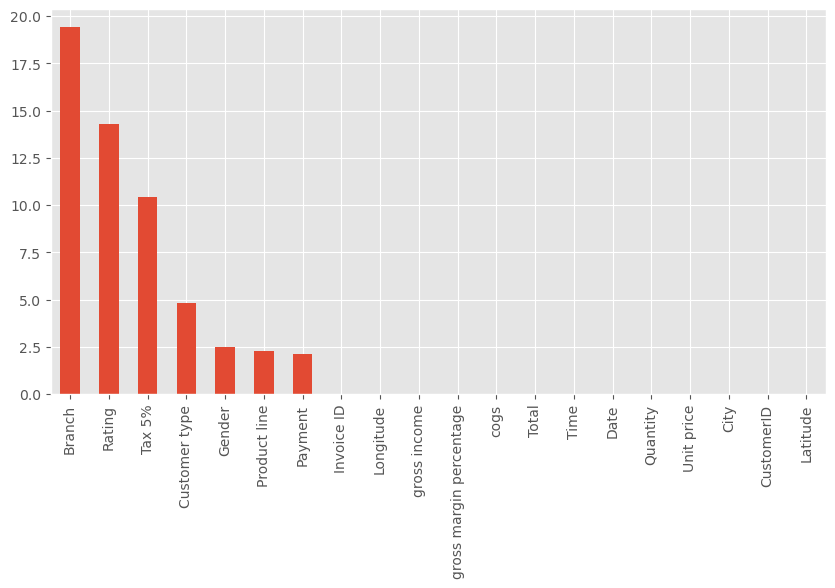

In [11]:
null_perc.sort_values(ascending = False).plot(kind='bar')

We have 7 fields with NULLs, with "Branch" having maximum NULLs ( 19.4%)

Making a copy of data for Data Wrangling section and further EDA, so that the original data stays as it is in case it is required for further reference later.

In [12]:
df_2 = df.copy()

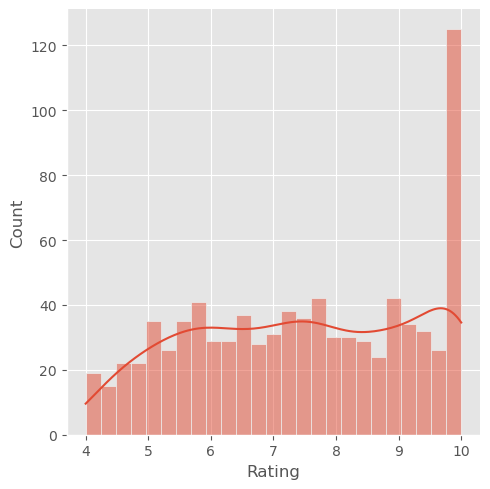

In [13]:
sns.displot(df_2.Rating,bins=25,kde=True)

### **Imputing NULLs for Ratings**

Ratings can be imputed with Mean rating values

In [14]:
df_2.Rating.mean()

7.462625437572931

In [15]:
df_2['Rating'] = df_2['Rating'].fillna(df_2.Rating.mean())

In [16]:
df_2.Rating.mean()

7.462625437572918

### Imputing NULLs for Tax

From the data we can see that Tax is 5% of the Invoice value always. We can impute nulls using the same formula

In [63]:
df_2[df_2['Tax 5%'].isnull()]

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,gross margin percentage,gross income,Rating,Longitude,Latitude,month,day,weekday,hour,minute


In [64]:
tax_perc = (df_2['Tax 5%']/df_2['Total'])*100
tax_perc.head(20)

0     5.0
1     5.0
2     5.0
3     5.0
4     5.0
5     5.0
6     5.0
7     5.0
8     5.0
9     5.0
10    5.0
11    5.0
12    5.0
13    5.0
14    5.0
15    5.0
16    5.0
17    5.0
18    5.0
19    5.0
dtype: float64

In [65]:
df_2['Tax 5%'] = df_2['Tax 5%'].fillna(df_2['Total']*0.05)

In [66]:
#df_2.isnull().sum().sort_values(ascending=False).head(6)

**Mode is a common way to fill in Categorical variables unless there is a linkage among variables ( As in case of Branch).
Thus, it is better to define a function which can be used multiple times for such variables**

In [67]:
def impute_mode(col):
    print("The mode of this field is :  " + df_2[col].mode()[0])
    df_2[col] = df_2[col].fillna(df_2[col].mode()[0])
    print("Mode value imputed")

### Imputing NULLs for Payment

Payments can be imputed with Mode as there is no logical way to find out what method was used.

In [68]:
impute_mode('Payment')

The mode of this field is :  Ewallet
Mode value imputed


### Imputing NULLs for Customer Type

Customer Type has just 5% of Nulls and it is better to complete the data with mode imputation than leaving it as it is

In [69]:
impute_mode('Customer type')

The mode of this field is :  Normal
Mode value imputed


### Imputing NULLs for Gender

Similar to Customer type, Gender also has lower % of NULLs and can be imputed with Mode

In [24]:
impute_mode('Gender')

The mode of this field is :  Female
Mode value imputed


### Imputing NULLs for Product Line

In [25]:
impute_mode('Product line')

The mode of this field is :  Health and beauty
Mode value imputed


### Imputing NULLs for Branch

Branch and City are linked thus we will be impute them conditionally-

In [26]:
df_2.groupby(by = ['Branch','City']).agg({'Gender':'count'})

,,Gender
Branch,City,
A,Yangon,281
B,Mandalay,265
C,Naypyitaw,260


In [27]:
df_2[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


**Based on the above values, we can write the following logic to impute Branch as per the City values** 


In [28]:
for i in range(len(df_2['Branch'])):
    if pd.isna(df_2['Branch'][i])==True:
        if(df_2['City'][i].strip()=='Yangon'):
            df_2['Branch'][i]="A"
            #print("NA imputed as Branch A")
        
        elif(df_2['City'][i].strip()=='Naypyitaw'):
            df_2['Branch'][i]='C'
            #print("NA imputed as Branch C")

        elif(df_2['City'][i].strip() == "Mandalay"):
            df_2['Branch'][i] = "B"
            #print("NA imputed as Branch B")

        else:
            print("Invalid city")
            
        
            

### Verifying NULL% after imputations

Finally we can verify that all columns have 0% NULLs suing the same logic as earlier for NULL % calculation

In [29]:
null_perc = (df_2.isnull().sum()/len(df_2))*100

null_perc.sort_values(ascending = False)

Invoice ID                 0.0
Branch                     0.0
Longitude                  0.0
Rating                     0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Total                      0.0
Tax 5%                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
CustomerID                 0.0
Latitude                   0.0
dtype: float64

### Adding fields for timeseries analysis


In [30]:
type(df_2.Date[0])

str

In [31]:
#Coverting data column into datetime

df_2.Date = pd.to_datetime(df_2.Date)

#adding a month,day and weekday columns
df_2['month'] = df_2.Date.dt.month
df_2['day'] = df_2.Date.dt.day
df_2['weekday'] = df_2.Date.dt.day_name()

#adding a hour and minute column
df_2['hour'] = df_2.Time.str[0:2]
df_2['minute'] = df_2.Time.str[3:5]

df_2['hour'] = pd.to_numeric(df_2['hour'])
df_2['minute'] = pd.to_numeric(df_2['minute'])



#### Checking final data types and NULL counts

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   CustomerID               1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

## 3. Univariate Analysis ( Quantitative )

For our Univariate analysis in this case, we are going to plot Violinplot and Stripplot using Seaborn library.

In [70]:
#Defining function for Univariate Analysis of Quantitiative Varibles

def univariate_quant(col,hue=None):
  
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
        
    axes[1].set_title("Strip plot of " + col ,size = 14)
    sns.stripplot(df_2[col],ax=axes[1],color = "#4CB391")
    
    axes[0].set_title("Violin plot of " + col)
    sns.violinplot(df_2[col],ax=axes[0],color = "grey") 
    
    plt.tight_layout()

### Unit Price

Univariate analysis of Unit Price will help us understand in general how the products are priced in supermarket catalogue

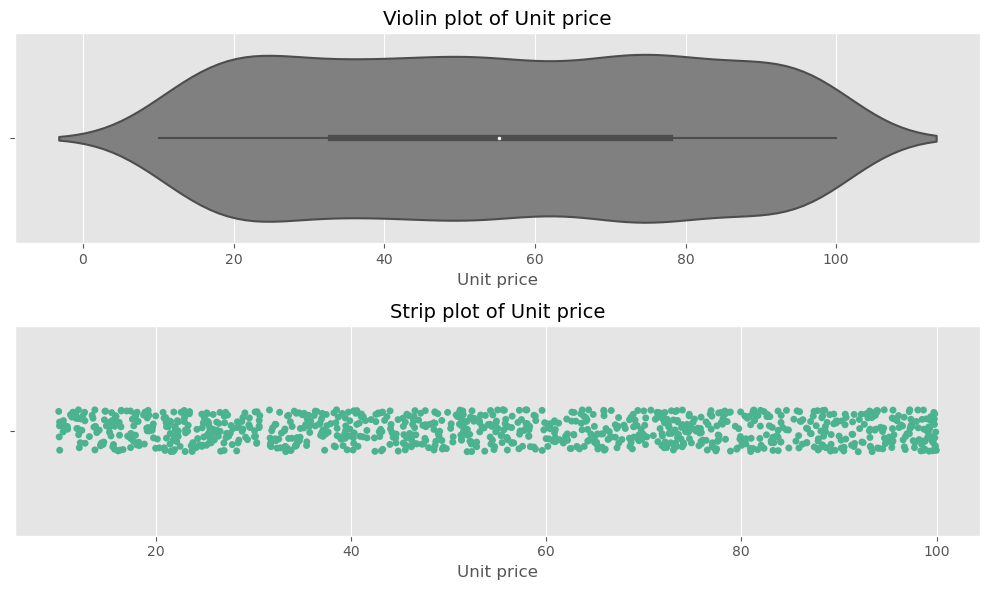

In [72]:
univariate_quant('Unit price')

Insights- 

* Unit price doesn't follow a normal distribution, it is more or less similar frequency for range 30-80

### Invoice Amount

Univariate analysis of Invoice Amount will help us understand in general how much is the bill amount per transaction

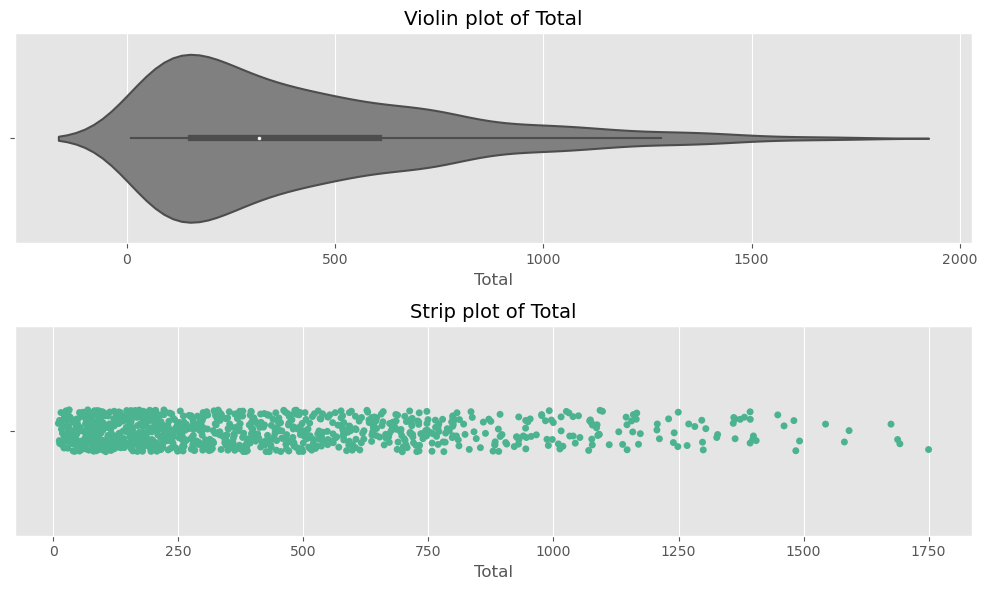

In [73]:
univariate_quant('Total')

Insights- 

* It has a right skewed distribution, with majority of values lying in under 500 range.

### Cost of Goods sold

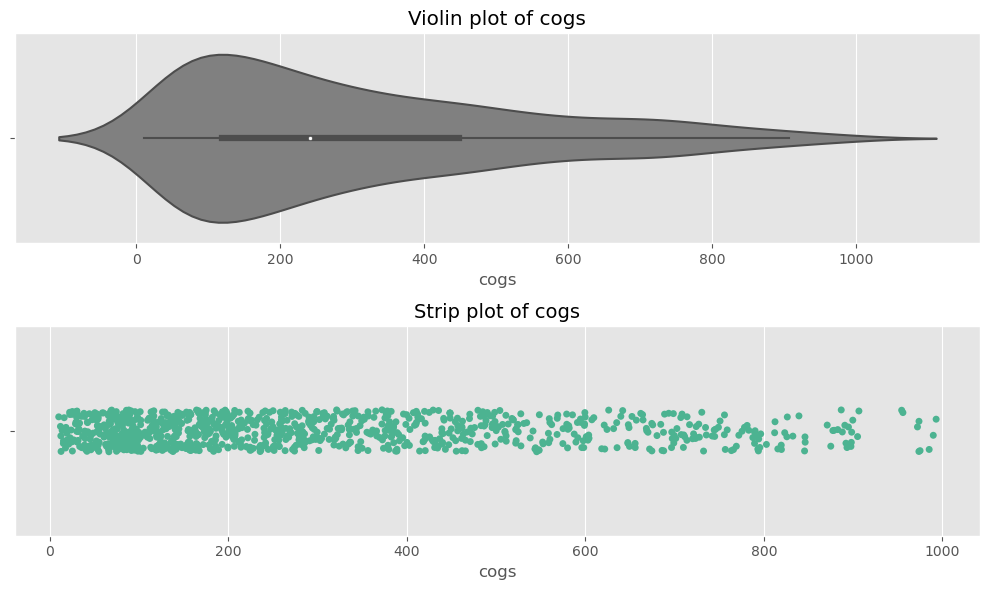

In [74]:
univariate_quant('cogs')

Insights- 

* It also has a right skewed distribution, with majority of values lying in under 600 range.
* It is apparent that  Invoice amount and COGS might be realted with some mathermatical rule/equation.

### Gross Income

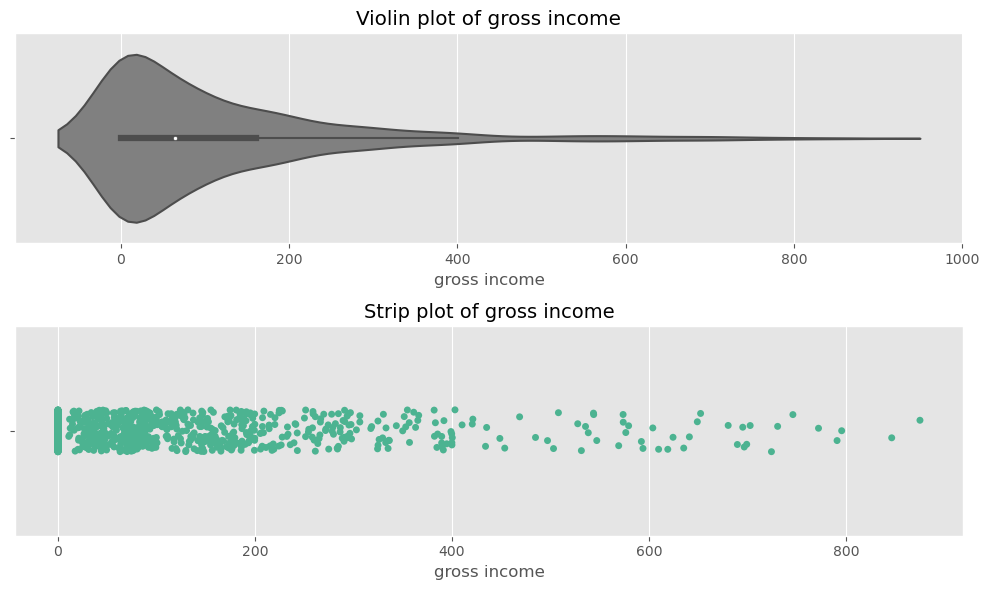

In [37]:
univariate_quant('gross income')

Insights- 

* Since gross income is derived out of Invoice amount and COGS, the distribution is similar.

### Ratings

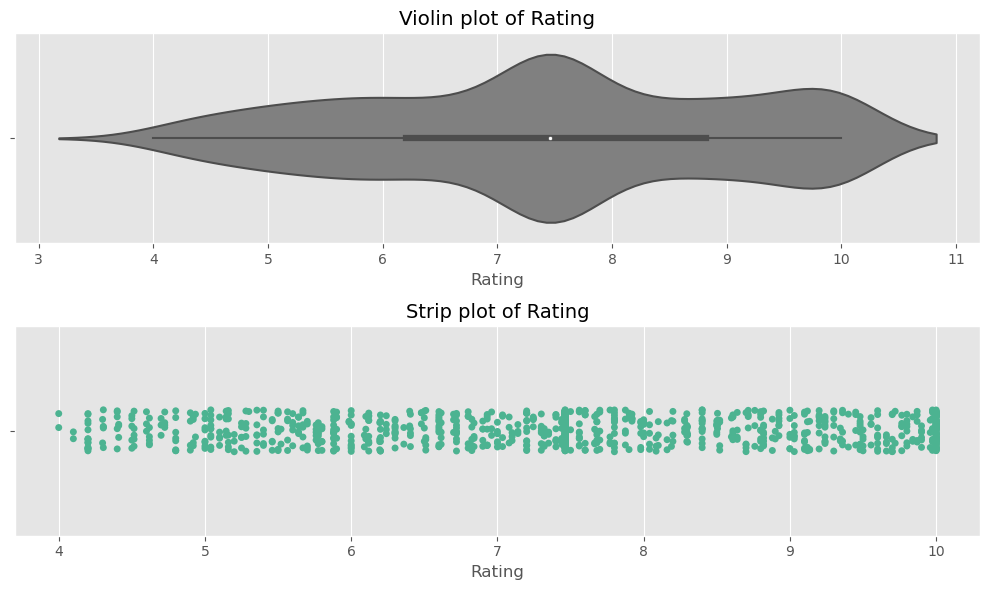

In [75]:
univariate_quant('Rating')

Insights- 

* Ratings do have a similar to normal distribution with mean at around 7.5 rating.
* There are much lesser ratings in 3-5 range which is a good sign for the company.

### Quantity purchased

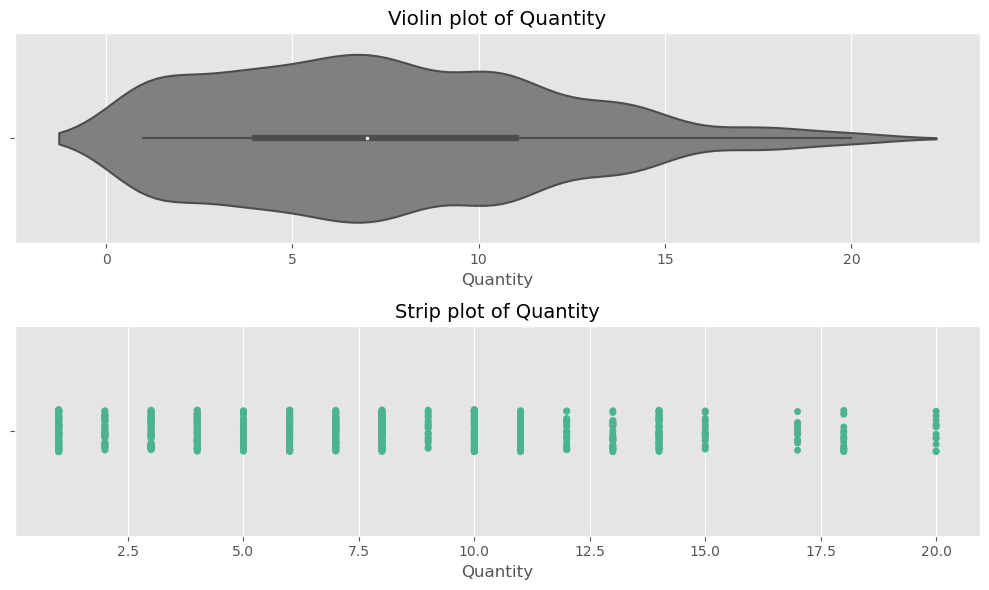

In [76]:
univariate_quant('Quantity')

Insights- 

* The distribution is relatively a flatter one, the range 1-13 is most dense. 
* Mean is 7, meaning 7 is the most frequent order size.

## 4. Univariate Analysis ( Categorical )

The purpose is to understand the bias in the data with respect to various categories

### Across City

<AxesSubplot:>

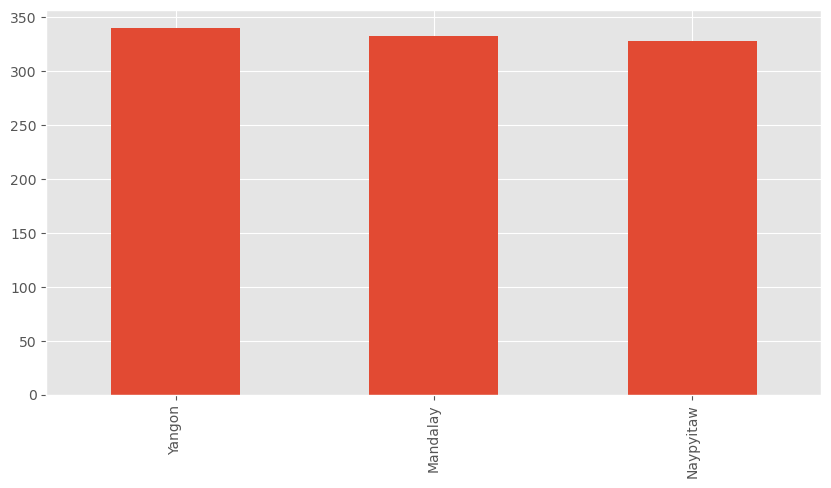

In [77]:
df_2['City'].value_counts().head(10).plot.bar()

Insights - 

* All cities have almost equal number of transactions.

### Across Gender


<AxesSubplot:>

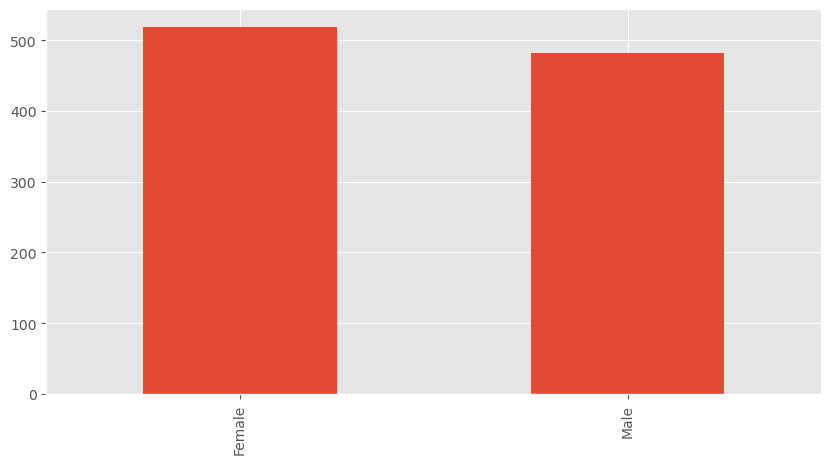

In [78]:
df_2['Gender'].value_counts().plot.bar()

Insights - 

Females transact more as compared to males. 
There can be multiple reasons for this which can be a part of further analysis - 
* Is supermarket known for female oriented products?
* Does region in general have more females than males ?
* It might be a surprise insight for the supermarket and a particular factor might be causing it - Store aesthetics, offers on a select catalogue etc.

### Across Product Line

<AxesSubplot:>

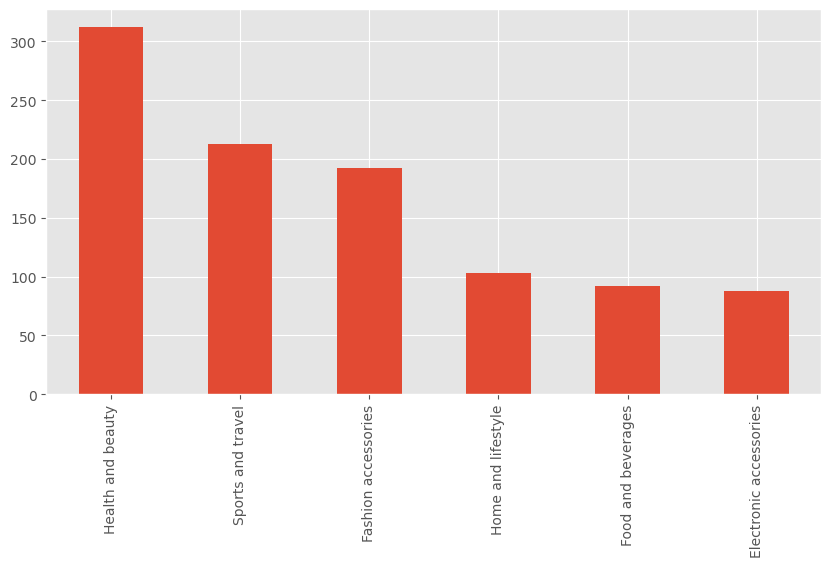

In [79]:
df_2['Product line'].value_counts().plot.bar()

Insights - 

There are 2 types of product lines because there is a huge gap in transaction among top 3 and bottom 3 product lines. 

1. Health & Beauty , Sports , Fashion constitute majority of the transactions and are high selling product lines for the supermarket. 

2. The other 3 product lines are not selling as much. 

3. Health and Beauty is top selling product line with a healthy margin. 

The possible reasons for this might be following - 
 
 * There is differentiation on focus by supermarket - there are more products on sale from top 3 as compared to bottom 3 
 * There are special offers on top 3 which are driving the sales. 
 * The prices and quality for top 3 are more competetive than the rest. 
 * The management is more focused and concerned with the growth of top 3 rather than others ( Possibly due to low margins )

### Across Payment Modes

<AxesSubplot:>

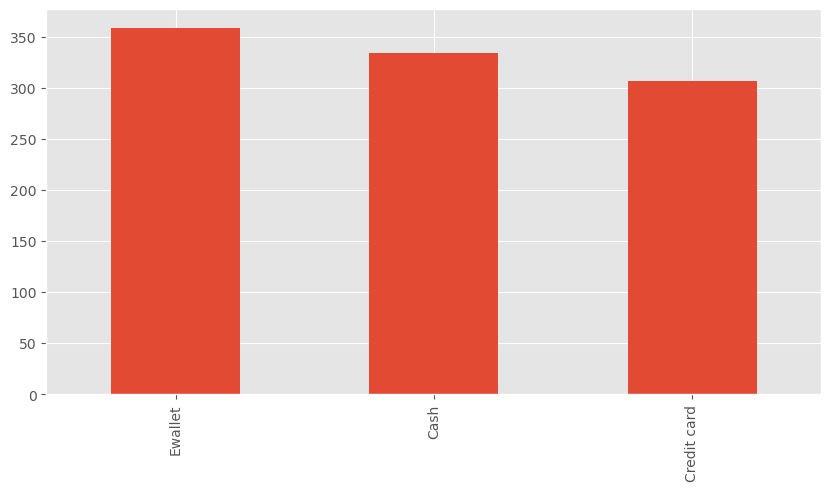

In [80]:
df_2['Payment'].value_counts().plot.bar()

Insights - 

* E Wallet is most prefered payment mode while Credit card is least.

### Across Customer Type

<AxesSubplot:>

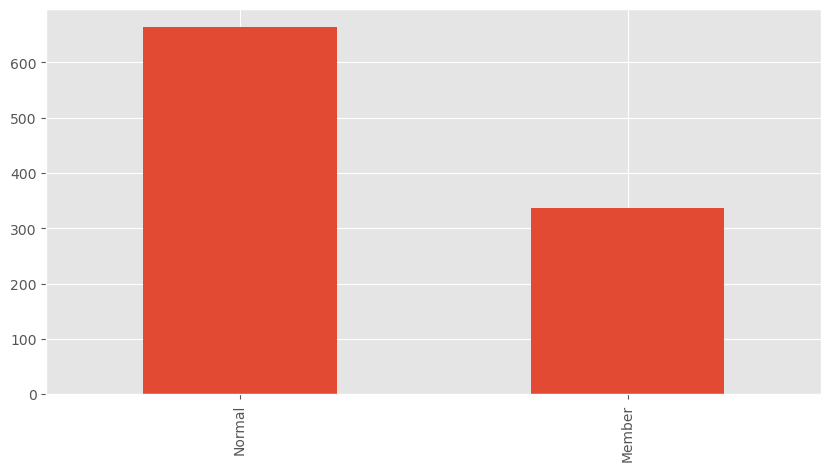

In [81]:
df_2['Customer type'].value_counts().plot.bar()

Insights - 

2/3rd of the transactions are done by Normal Members and only 1/3rd by Members

### Unique Customers who are Member/Non-Members

While we have already looked at the number of transactions, it is also worthwhile to look at the number of Member/Normal customers that the Supermarket has.

<AxesSubplot:xlabel='Customer type', ylabel='CustomerID'>

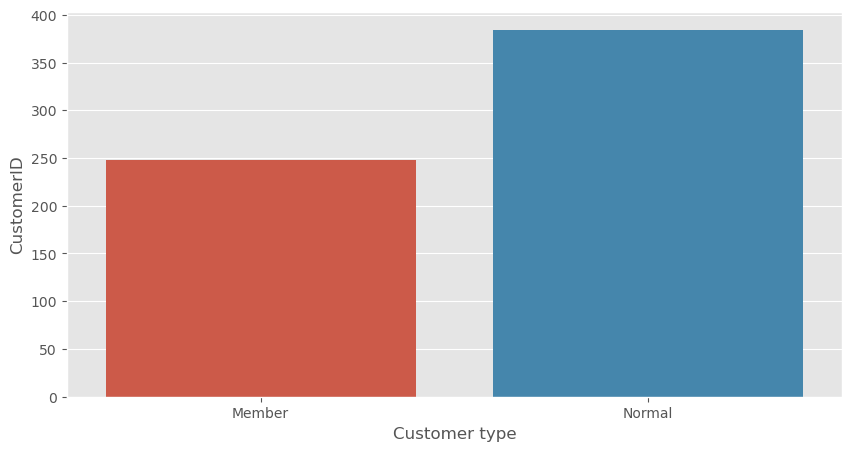

In [82]:
customer_members = df_2[['CustomerID','Customer type']].groupby(['Customer type'], as_index = False).nunique()
sns.barplot(x=customer_members["Customer type"], y='CustomerID',data=customer_members)

In [83]:
customer_members

,Customer type,CustomerID
0,Member,248
1,Normal,384


insights - 

* There are about 248 Members and 384 Normal customers with the Supermarket. 

* It can be seen that the ratio of Members is more than the Transactions done by Members. 

* It is essentially telling us that Members are not contibuting to more transactions as would be expected from those.

###  Stores Location on map

In [84]:
city_map= df_2[['City','Longitude','Latitude']].drop_duplicates()
city_map

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In [85]:
for(i,j) in city_map.iterrows():
  print(i)
  print('\n',j)

0

 City          Yangon
Longitude    96.1735
Latitude     16.8409
Name: 0, dtype: object
1

 City         Naypyitaw
Longitude      96.0785
Latitude       19.7633
Name: 1, dtype: object
9

 City         Mandalay
Longitude     96.0891
Latitude      21.9588
Name: 9, dtype: object


In [86]:
geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5,
                     width = 1000, height = 500,
                     tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in city_map.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)

geo_map

Insights - 

The cities are distributed across lengths of Myanmar and are not close to each other. 

Yangon is the only coastal city where the chain is present, other ones are located in the middle of Myanmar. 

Company can expand in North and East of Myanmar as there is no presence in those areas. 

Also, a big coastal city Sittwe is also an option for later expansion.

## 5. Bivariate Analysis
The purpose of Heatmap here is to look for any significant correlations among continuous variables in our data.

Since majority of the quantitative variables in this sales data are mathematically related to each other, the use of Heatmap in this case is not of much help. 

For example following related variables - 
* Invoice amount = Unit Price * Quantity
* COGS = Invoice Amount * 0.0476
* Gross Income = Invoice Amount - COGS

<AxesSubplot:>

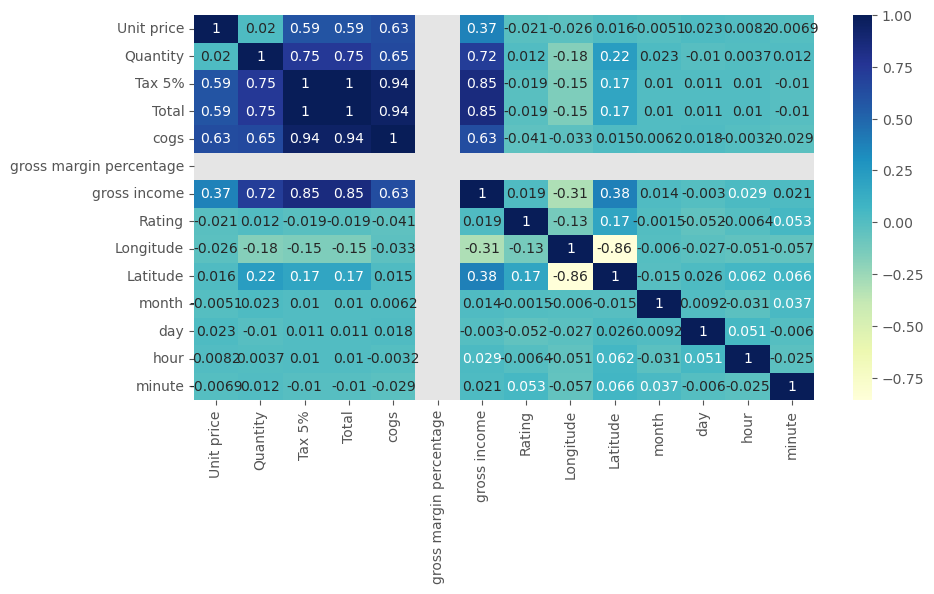

In [87]:
corr = df_2.corr()
sns.heatmap(corr,cmap='YlGnBu',annot=True)

As expected, we see high correlation in almost all sales related fields because they are derived from each other.

#### Function for bivariate analysis -

There are 4 important metrics that can provide maximum insights in this sales data - 

1. Sales 
2. AOV - Average Order Value
3. Mean Order Quantity
4. Ratings

In [89]:
# Defining function for univariate Analysis of Quantitive variable

def multiple_analysis(col,hue=None):
    
    def format_as(x):
        return '{:.0f}%({:.0f})'.format(x,df_2['Total'].sum()*x/100)
    
    
    sales_group = df_2[[col,'Total']].groupby(col).sum()
    avg_rating = df_2[[col,'Rating']].groupby(col).mean()
    avg_sales = df_2[[col,'Total']].groupby(col).mean()
    avg_qty = df_2[[col,'Quantity']].groupby(col).mean()
    
    
    fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (12,10))
    axes[0,0].set_title("Sales by " + col,y=1.2, size = 18)
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),fontsize=10)
    
    axes[0,0].pie(sales_group['Total'],labels = sales_group.index,autopct=format_as,textprops ={'fontsize':10},radius=1.5)
    
    
    axes[0,1].set_title("Average Sales by " + col,y=1.2,size=18)
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(),fontsize=20)
    axes[0,1].set_xlabel(axes[0,0].get_xticklabels(),fontsize=15)
    axes[0,1].set_ylabel(axes[0,0].get_yticklabels(),fontsize=15)
    g = sns.barplot(x=avg_sales.index,y='Total',color = '#f7a516',data=avg_sales,ax=axes[0,1])
    g.set_xticklabels(labels=avg_sales.index,size=12,rotation=30)
    
    
    axes[1,0].set_title("Average Ratings by " + col,y=1.1,size = 18 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=15,x=1.1)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=15)
    h = sns.barplot(y=avg_rating.index, x='Rating', color="#305cb0",data=avg_rating,ax=axes[1,0],orient='h')
    #h.set_yticklabels(labels=avg_sales.index,size=12,rotation=90,va='center')
    
    axes[1,1].set_title("Average Quantity sold by " + col,y=1.1,size = 18)                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=15)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=15)
    i = sns.barplot(y=avg_qty.index, x='Quantity', color="#712f80",data=avg_qty,ax=axes[1,1],orient='h')
    #i.set_yticklabels(labels=avg_sales.index,size=12,rotation=90,va='center')
    plt.tight_layout()
    
    

### Across City

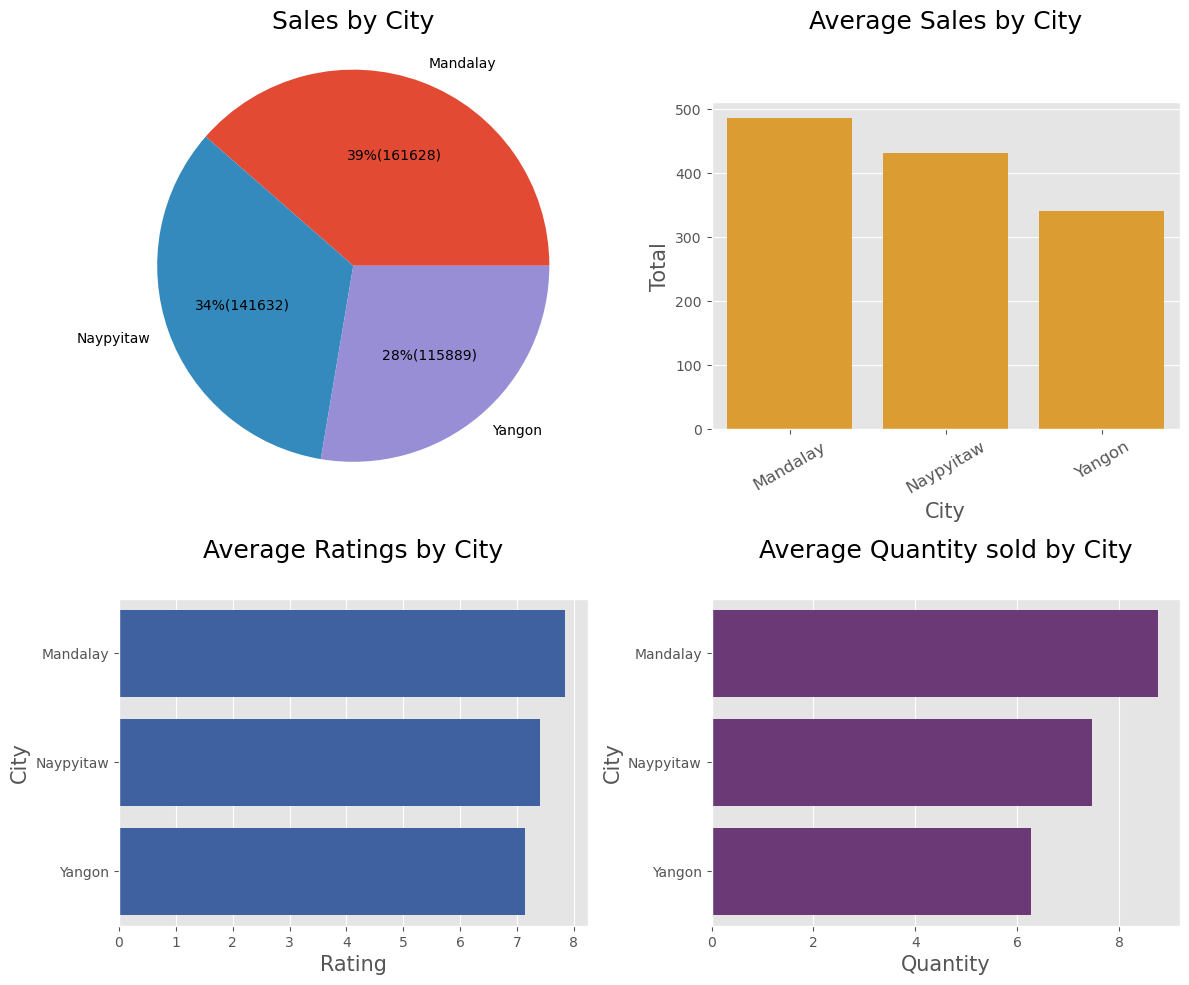

In [90]:
multiple_analysis('City')

Insights - 

* Although the number of transactions were similar as we saw earlier in Univariate analysis, Mandalay city have significantly more sales at 39%

* Yangon sales are least at 28%

* The difference in sales is essentially driven by the differences in Average Sales, which is maximum for Mandalay and really low for Yangon

* Further, we can say that the higher Average Sales is driven by higher mean quantity as seen in the Right bottom chart

* Ratings also reflect a similar story, with highest ratings for Mandalay and least for Yangon. 

* All of above points point to a big scope of improvement in Yangon for the supermarket chain.

### Across Customer Type

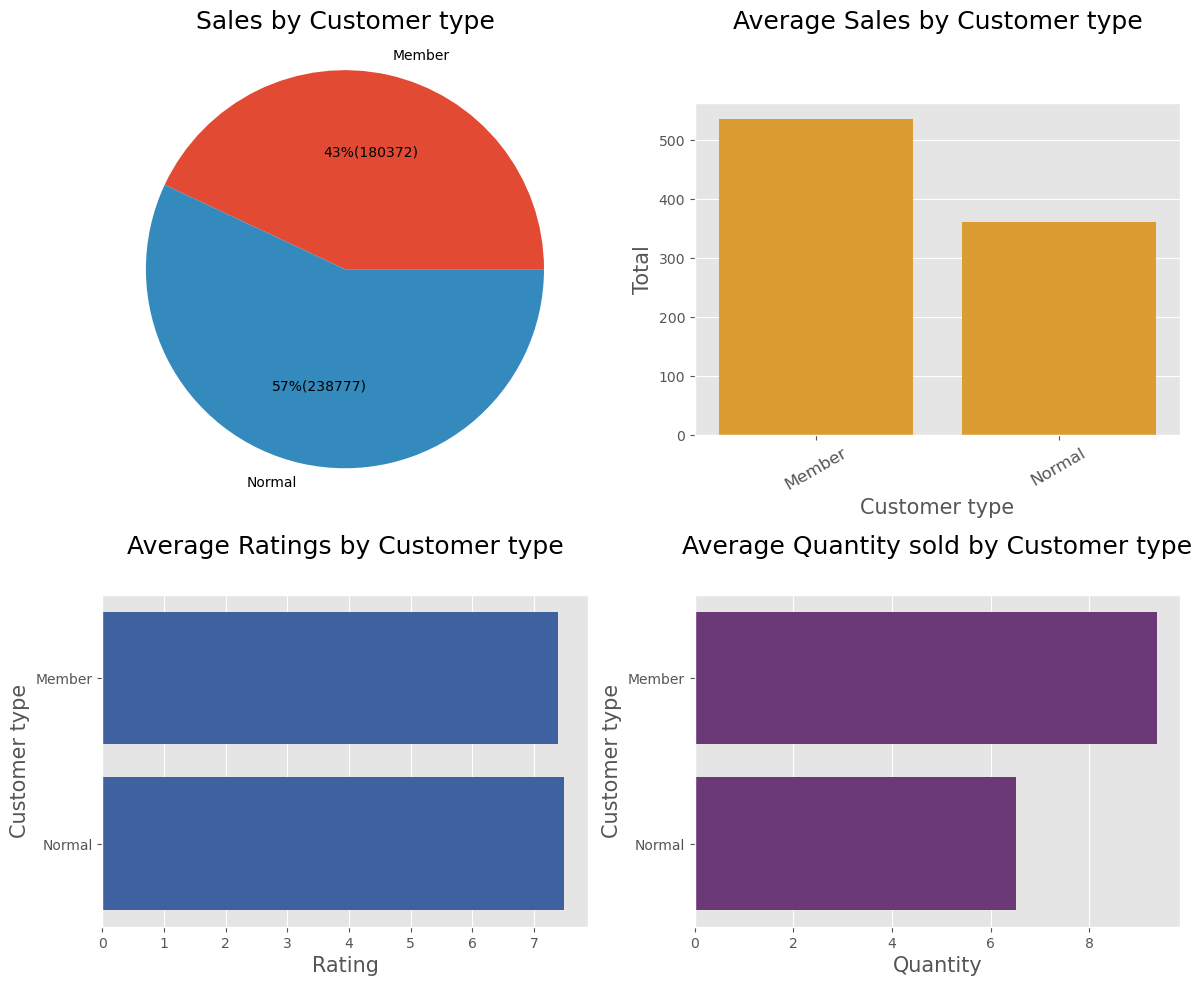

In [91]:
multiple_analysis('Customer type')

Insights - 

* Members are contributing to 43% of sales, driven by really high Average Sales of 500 a compared to 300 of a normal customer

* The difference in Average Sales is driven by the difference in Average quantity 

* Ratings are similar by Member and Normal customers.

### Across Gender

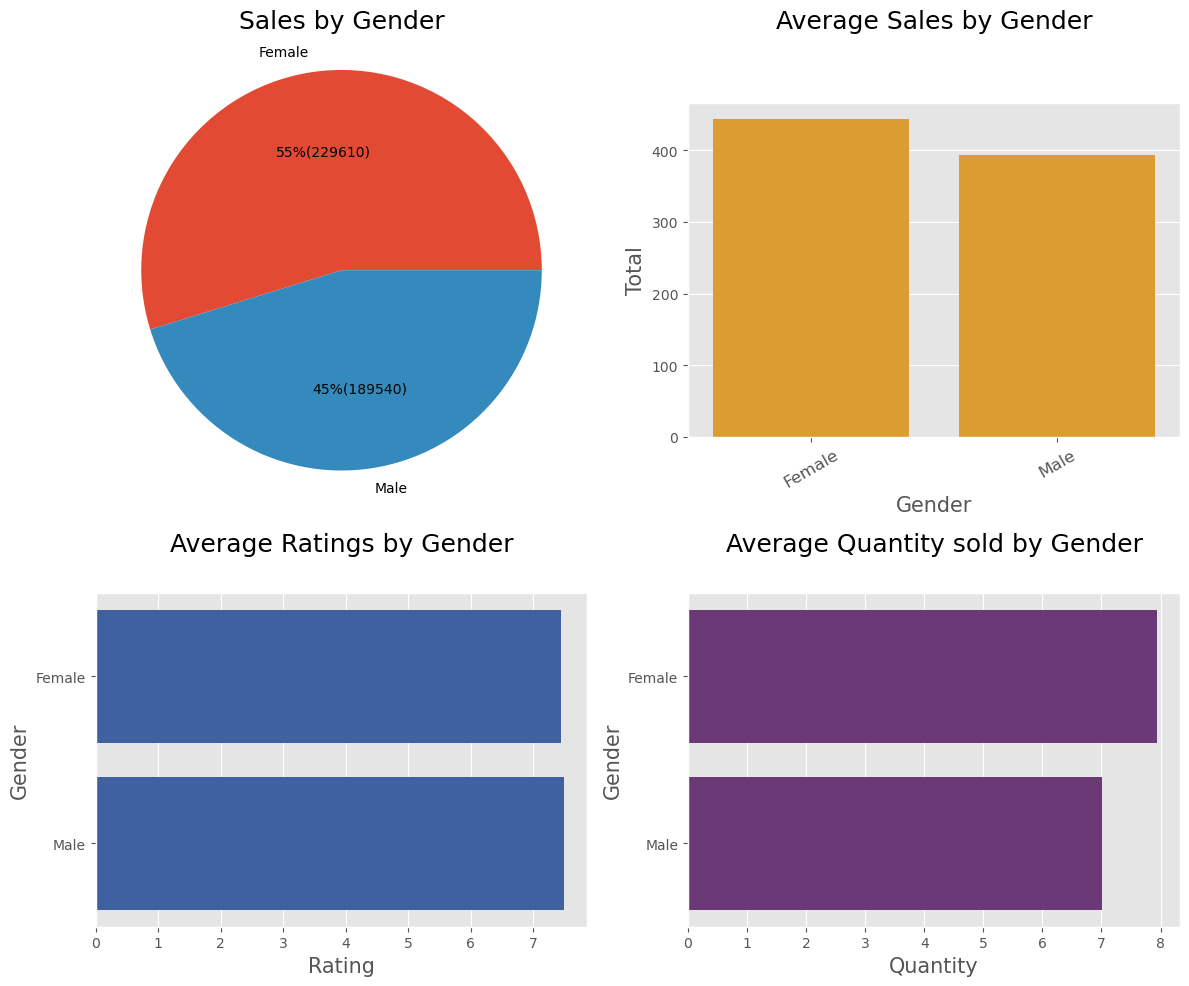

In [92]:
multiple_analysis('Gender')

Insights - 

* As expected after Univariate analysis, females are driving more sales at 55%

* The Average Sales and average quantity are also significantly higher for females

* The ratings are not impacted by Gender

### Across Product Line

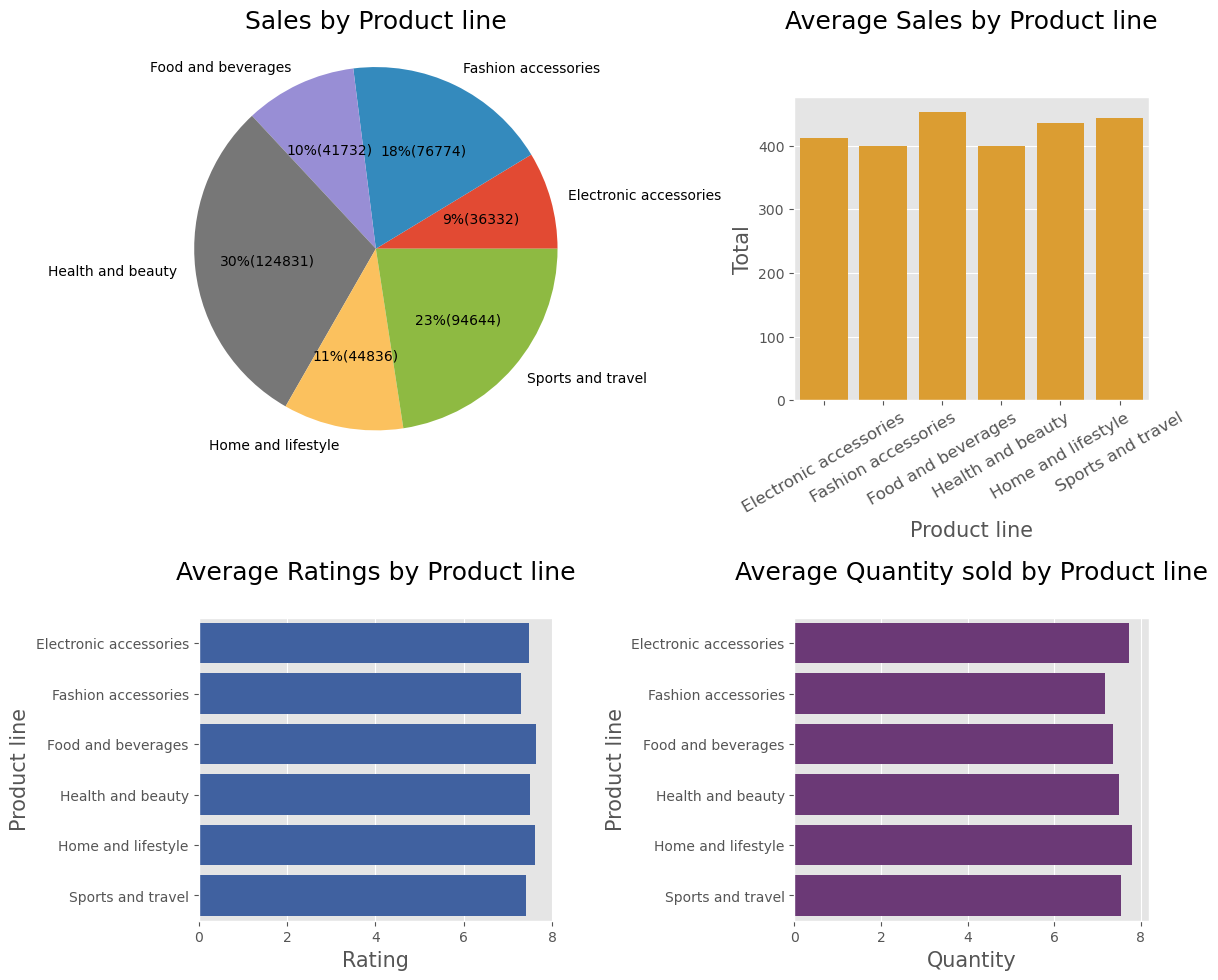

In [93]:
multiple_analysis('Product line')

Insights - 

* Health and Beauty is the most prominent segment with 30% of sales.
* 3 bottom segments - Food & Beverages, Electronics, and Home & lifestyle together make 30% of the sales. 
* Food & Beverages have the maximum Average Sales among all categories, Home and lifestyle also has a relatively higher Average Sale. 
* Customers love these 2 segments as the ratings are also highest for these 2 segments. 
* If the company could drive more transactions in above 2 segments, it will boost the sales significantly due to their higher average Sales

### Across Payment Modes


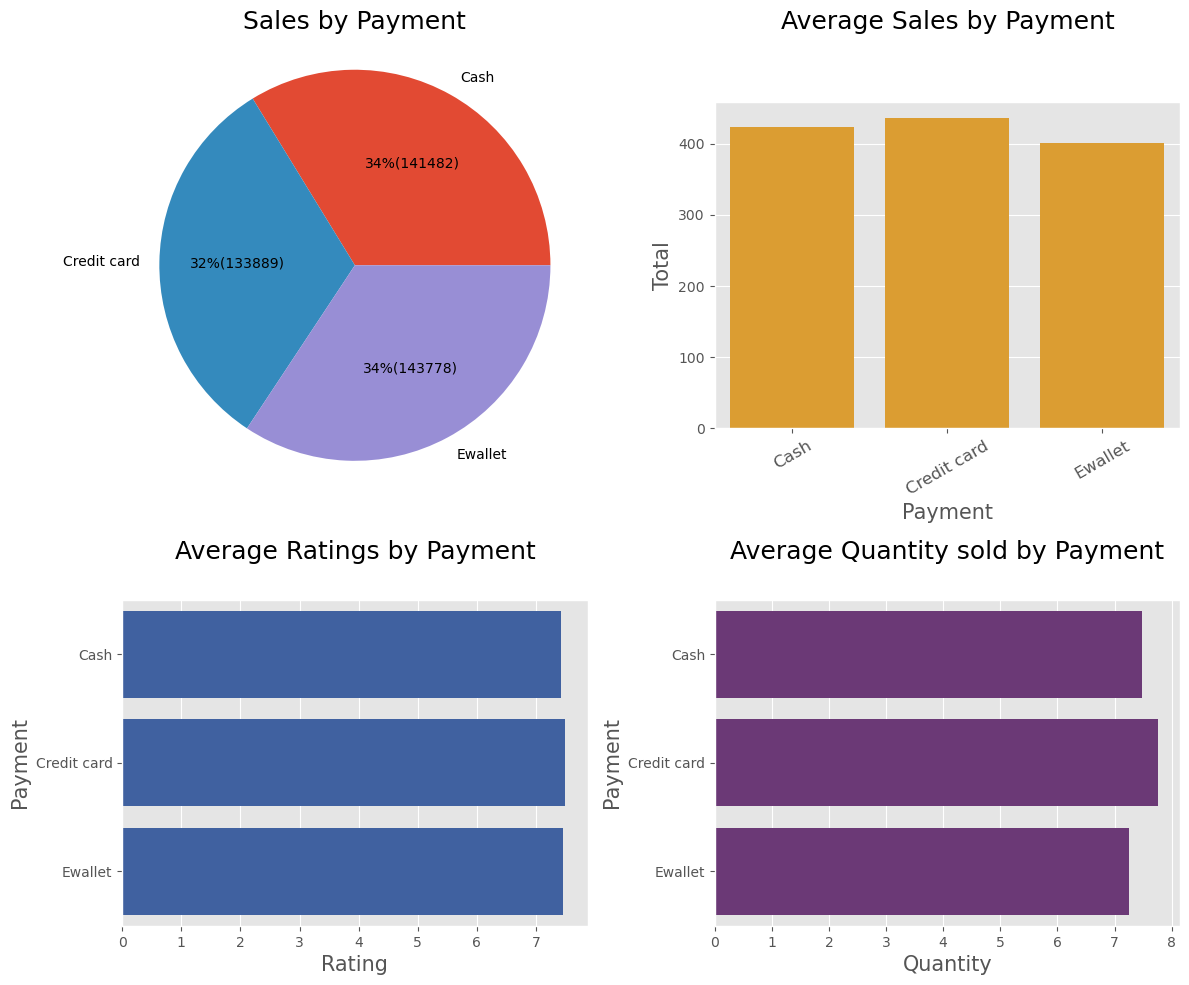

In [94]:
multiple_analysis('Payment')

Insights - 

* Payment mode doesn't seem to have an impact in any metric as modes have equal distribution in sales, ratings etc. 
* Average Sales for Credit cards is relatively higher but the difference is not significant for it to prove a hypothesis.

## 6.Time Series Analysis
Here, we will be plotting the same 4 metrics as in last sections against a time variable for our analysis

In [95]:
# Defining function for univariate Analysis of Quantitive variable

def timeseries_analysis(col,hue=None):
    
    
    
    sales_group = df_2[[col,'Total']].groupby(col).sum()
    avg_rating = df_2[[col,'Rating']].groupby(col).mean()
    avg_sales = df_2[[col,'Total']].groupby(col).mean()
    avg_qty = df_2[[col,'Quantity']].groupby(col).mean()
    
    
    fig,axes = plt.subplots(nrows=2, ncols=2,figsize = (12,10))
    sns.lineplot(x=sales_group.index,y=sales_group['Total'],data=sales_group,ax=axes[0,0])
    
    
    axes[0,1].set_title("Average Sales by " + col,y=1.2,size=18)
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(),fontsize=10)
    axes[0,1].set_xlabel(axes[0,0].get_xticklabels(),fontsize=15)
    axes[0,1].set_ylabel(axes[0,0].get_yticklabels(),fontsize=15)
    sns.barplot(x=avg_sales.index,y='Total',color = '#f7a516',data=avg_sales,ax=axes[0,1])
    
    
    
    axes[1,0].set_title("Average Ratings by " + col,y=1.1,size = 18 )                     
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=15,x=1.1)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=15)
    sns.barplot(y=avg_rating.index, x='Rating', color="#305cb0",data=avg_rating,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Average Quantity sold by " + col,y=1.1,size = 18)                    
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=15)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=15)
    sns.barplot(y=avg_qty.index, x='Quantity', color="#712f80",data=avg_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()

### TimeSeries Analysis by Hour

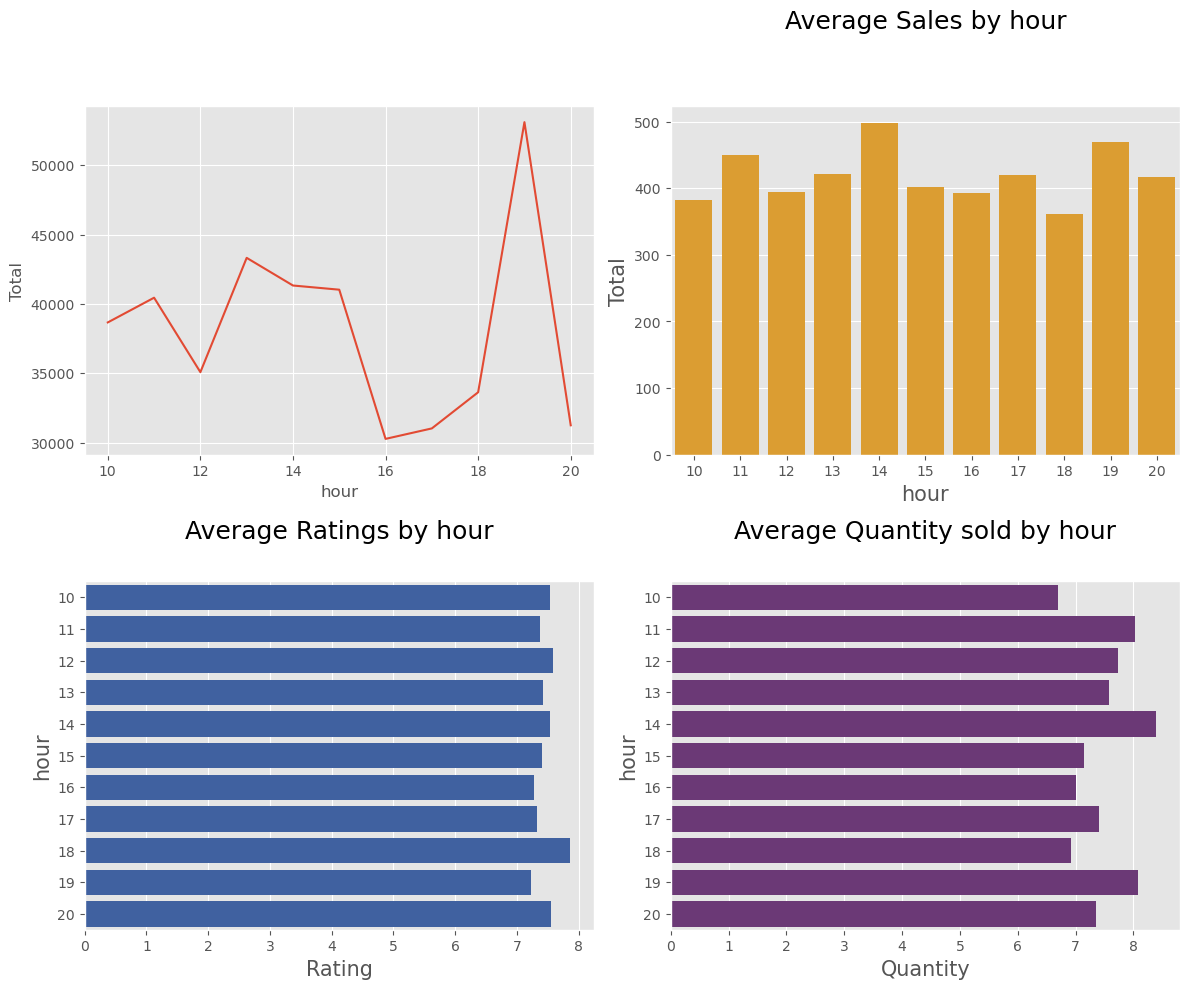

In [100]:
timeseries_analysis('hour')

Insights - 

* Sales peak sharply at 7PM in the evening 
* 4PM-6PM is a dead period with really low sales
* Stores see moderate sales during 10 AM to 3 PM
* Ratings, Order quantity logically should not be related to time of the day, hence any variation should be attributed to a random phenomenon.

### TimeSeries Analysis by Month

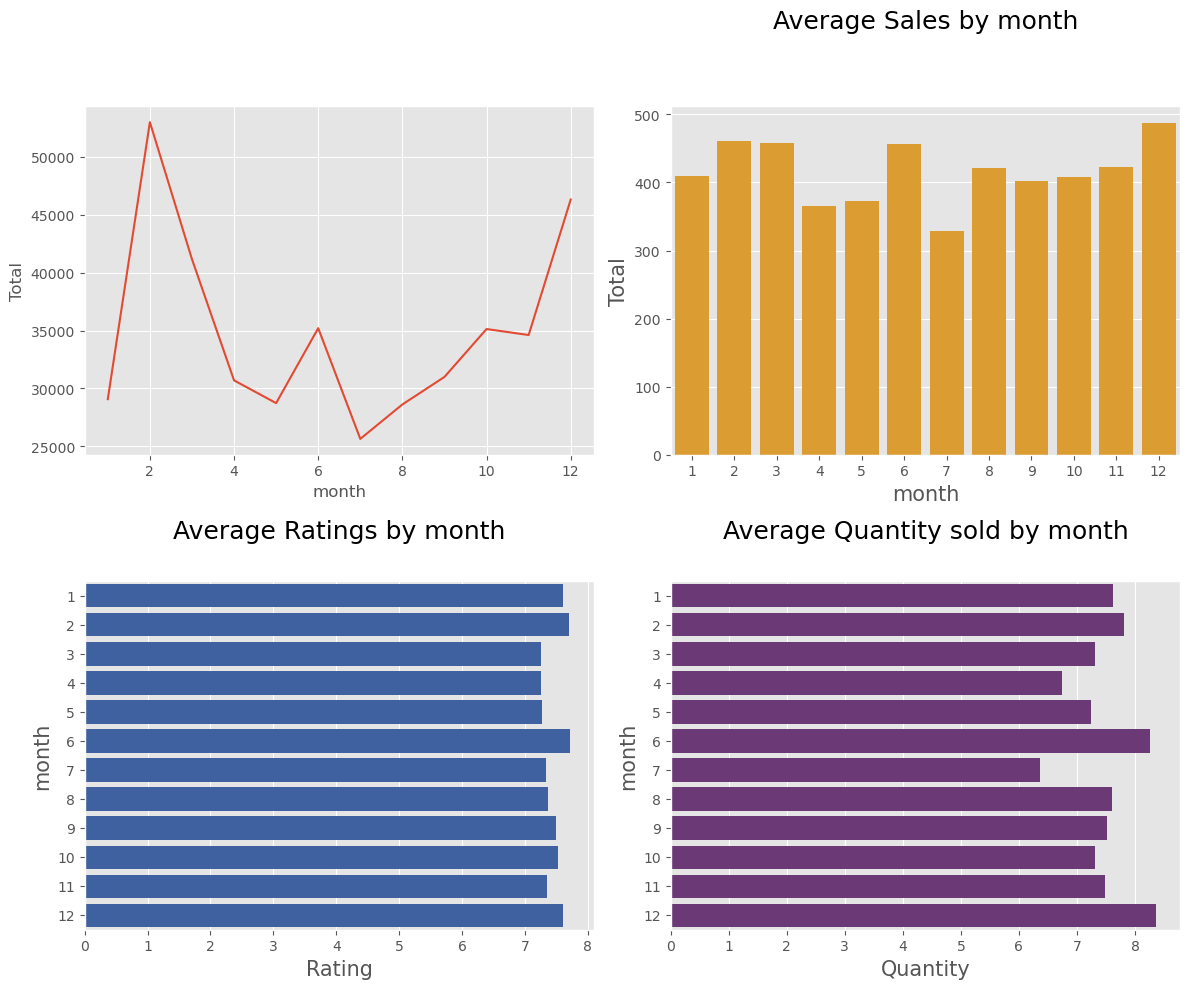

In [101]:
timeseries_analysis('month')

Insights - 

* February is peak sales month where sales go beyond 50k+. Jut for comparison, most of the other month accumulate less than 35k revenue.  
* There must be a reason for this spike in February. It can either be a festival in the region, or a season that's
 driving sales of particular segment or a promotional campaign that has worked well. 
* December also sees a significant spike, although not as steep as February but still significant. 
* April-Nov sales are on the lower side, with sales dipping close to 25k in July.

### Month on Month sales - Members and Non Members

<AxesSubplot:title={'center':'Average Sales per Month by Customer Type'}, xlabel='month', ylabel='Total'>

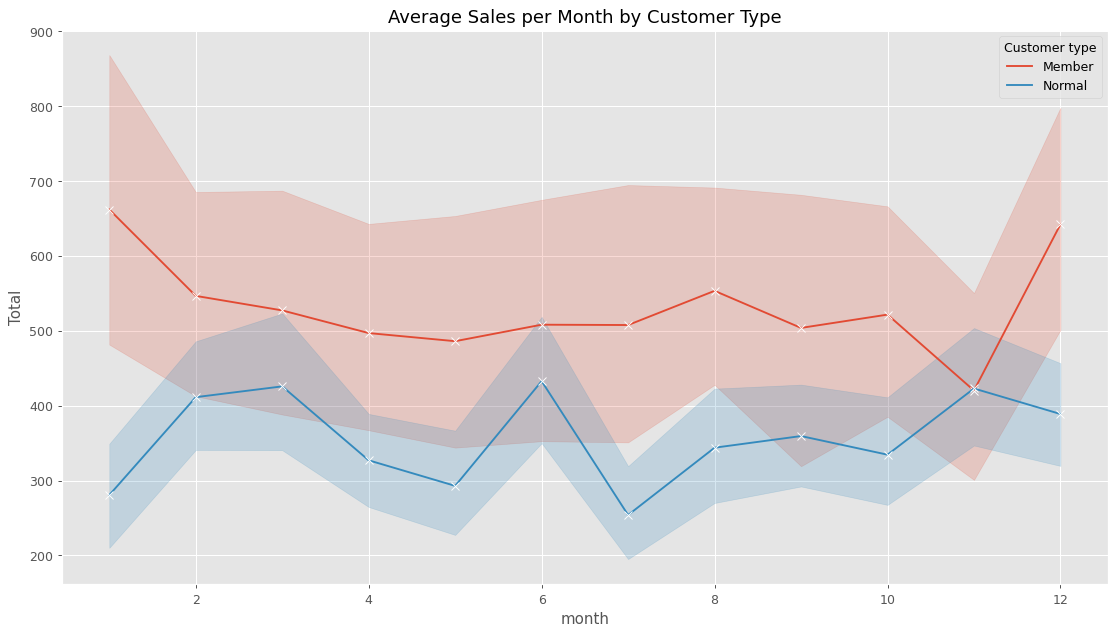

In [103]:
plt.figure(figsize=(15,8),dpi=90)
plt.title("Average Sales per Month by Customer Type")
sns.lineplot(data=df_2,x='month',y='Total',hue='Customer type',marker='x',style='Customer type',dashes=False)

Insights - 

* Members always have significantly more Average Sales than normal customers. 
* Members Average Sales has lesser fluctuations than Non members.

###  Customers across Cities

Text(0.5, 1.0, 'Sales per Customer by Cities')

<Figure size 1500x800 with 0 Axes>

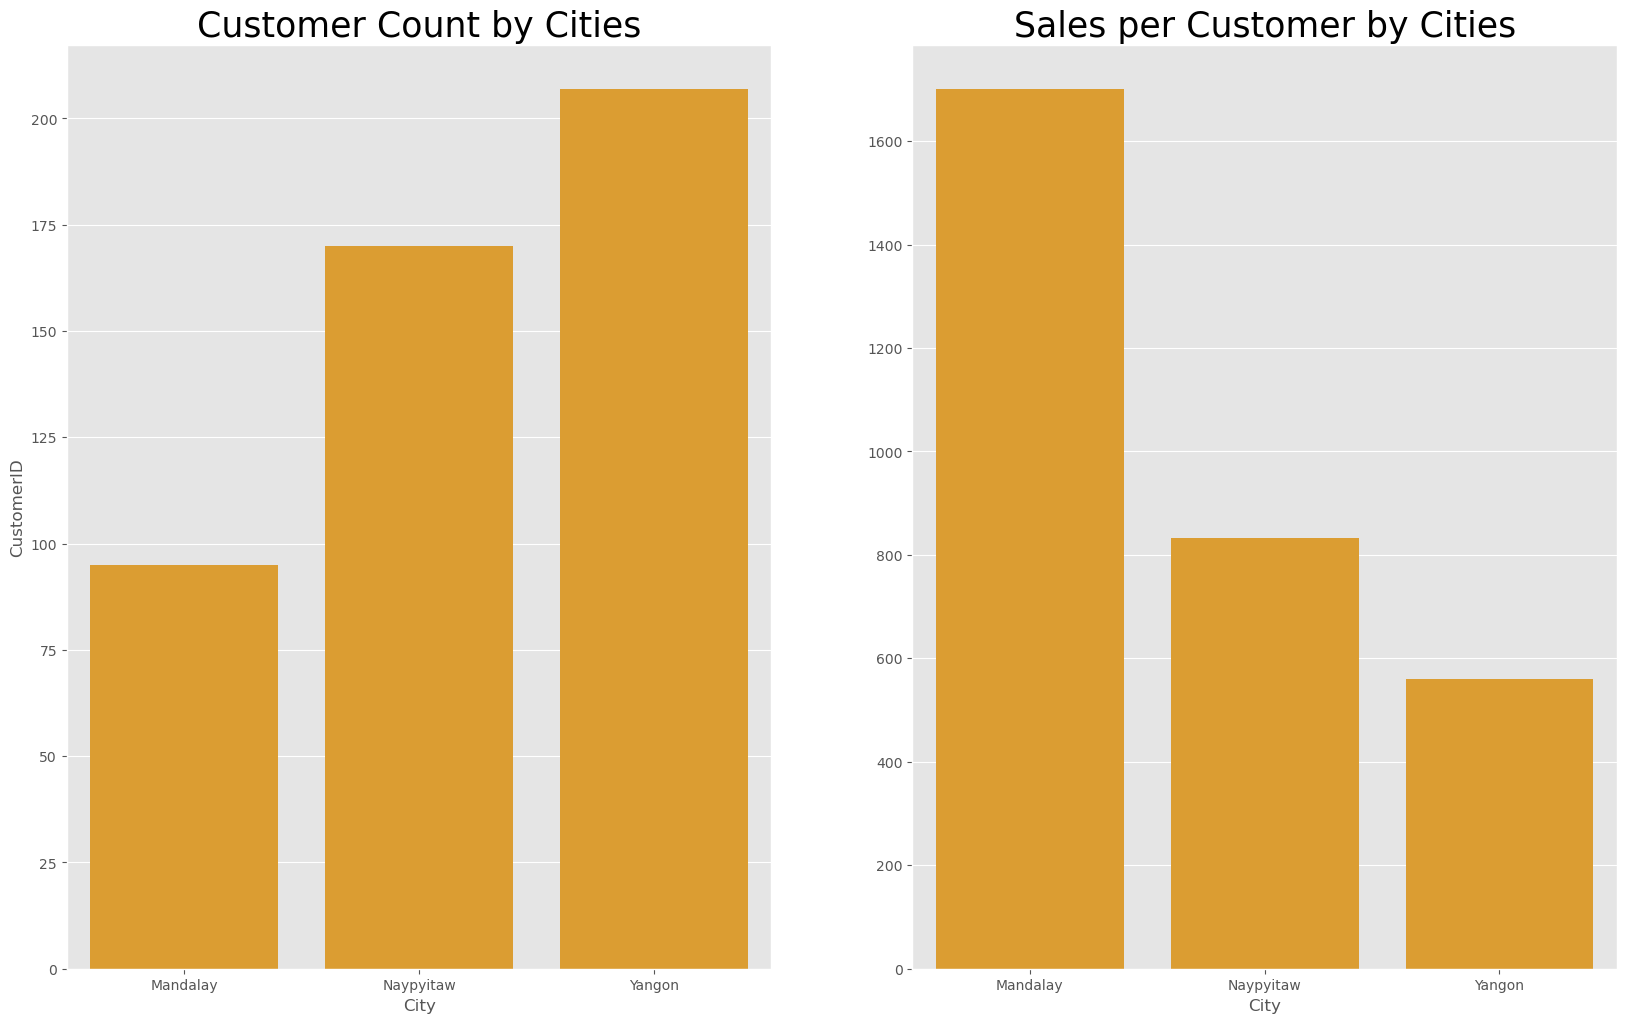

In [104]:
plt.figure(figsize=(15,8))

customer_across_city = df_2[['City','CustomerID']].groupby(['City']).nunique()
sales_across_city = df_2[['City','Total']].groupby('City').sum()
sales_per_customer = sales_across_city['Total']/customer_across_city['CustomerID']

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,12))

sns.barplot(x=customer_across_city.index,y='CustomerID',color='#f7a516',data=customer_across_city,ax=ax[0])
ax[0].set_title('Customer Count by Cities',size=25)

sns.barplot(x=customer_across_city.index,y=sales_per_customer.values,color='#f7a516',ax=ax[1])
ax[1].set_title('Sales per Customer by Cities',size=25)

Insights - 


* Mandalay has least unique customers (90), while Yangon hs most (200+)
* Sales per customers metric has opposite trend where each customer spends maximum in Mandalay ( 1600).


### Member/Non-Member Deep Dive
Finally, we'll see how our Member and Non Members perform across 4 metrics that we've used for bivariate analysis.

Text(0.5, 1.0, 'Average Quantity by City/Customer Type')

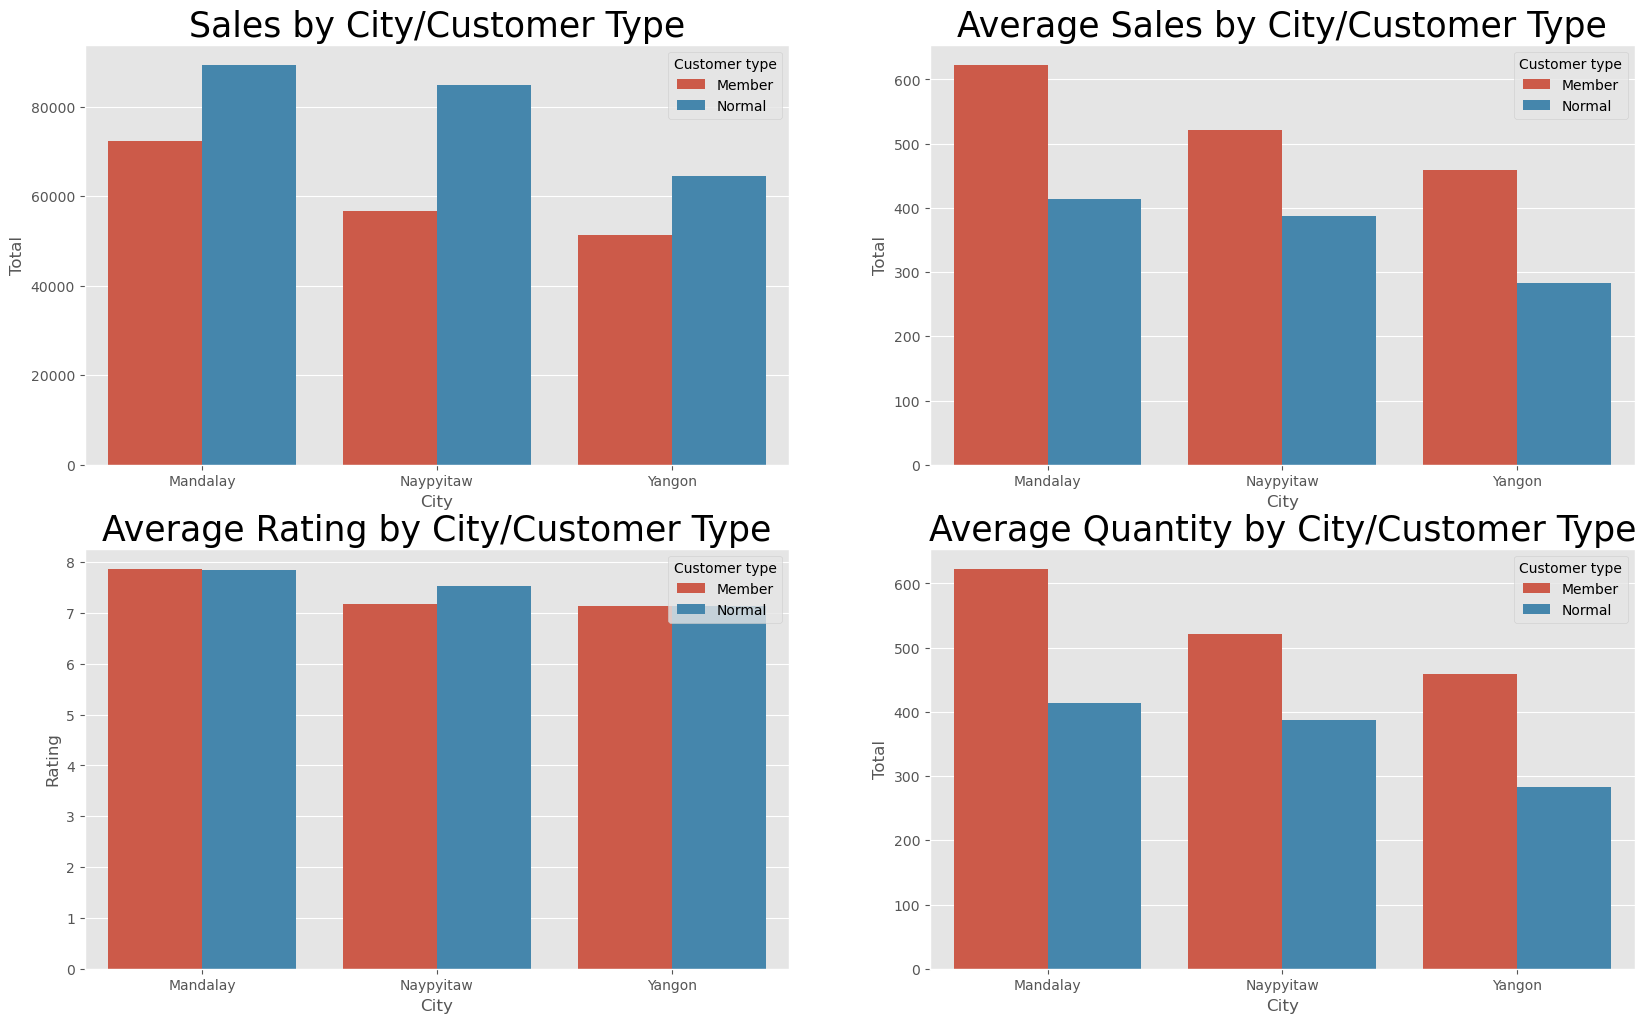

In [105]:
sales_group = df_2[['City','Customer type','Total']].groupby(['City','Customer type'],as_index=False).sum()
avg_rating = df_2[['City','Customer type','Rating']].groupby(['City','Customer type'],as_index=False).mean()                                                            
avg_sales = df_2[['City','Customer type','Total']].groupby(['City','Customer type'],as_index=False).mean()  
avg_qty = df_2[['City','Customer type','Total']].groupby(['City','Customer type'],as_index=False).mean()

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

sns.barplot(x=sales_group['City'],y='Total',data=sales_group,hue='Customer type',ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),fontsize=10)
axes[0,0].set_title('Sales by City/Customer Type',size=25)

sns.barplot(x=sales_group['City'],y='Total',data=avg_sales,hue='Customer type',ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),fontsize=10)
axes[0,1].set_title('Average Sales by City/Customer Type',size=25)

sns.barplot(x=sales_group['City'],y='Rating',data=avg_rating,hue='Customer type',ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),fontsize=10)
axes[1,0].set_title('Average Rating by City/Customer Type',size=25)

sns.barplot(x=sales_group['City'],y='Total',data=avg_qty,hue='Customer type',ax=axes[1,1])
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(),fontsize=10)
axes[1,1].set_title('Average Quantity by City/Customer Type',size=25)

Insights - 

* Normal customers have more sales in all cities. But that may be due to the fact that Non Members are higher in count as we've seen earlier.
* Members consistently have higher Average Sales than non members. 
* The Average Sales is driven by higher order quantity.

## 7. Final Insights

As per the insights discussed so far, we can have following final recommendations -

•	The Members are doing really well in terms of sales numbers for the company. Thus a campaign can be formulated to promote the member sign ups.

•	The spike in Feb sales are a hint that the stores have the potential to have higher sales throughout the year. Specially April to November period 
sales can be significantly improved by some focused marketing.

•	Food & Beverages, Home and lifestyle have the maximum Average Sales among all categories, but constitute just 20% of the total sales together. The ratings are also better than other categories.
 It is a sign that a strategy around promoting these categories can be formulated.

•	It is a good sign for the supermarket chain that Females are driving majority of the sales. Even females' dominated categories such as Health & Beauty, Fashion are top product categories. 
The company can scale this further to improve overall revenue.
 Female tend to be higher spenders than Men, and company can take more advantage of this data insight.

•	Yangon has least sales and Average Sales of all cities and the difference is significant too. Hence a focused marketing campaign can be launched to meet the potential sale in this city.